In [73]:
##Lib importing
##import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [74]:
##data Loading and preprocessing
from sklearn.datasets import load_iris
df = load_iris()
S=pd.DataFrame(data=df.data, columns=df.feature_names)
S['target'] = df.target
S.info()
S.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [75]:
##normalizing and spliting
X = df.data[:, [2, 3]]
y = df.target
X = X[y != 2]
y = y[y != 2]
y[y==0]=-1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

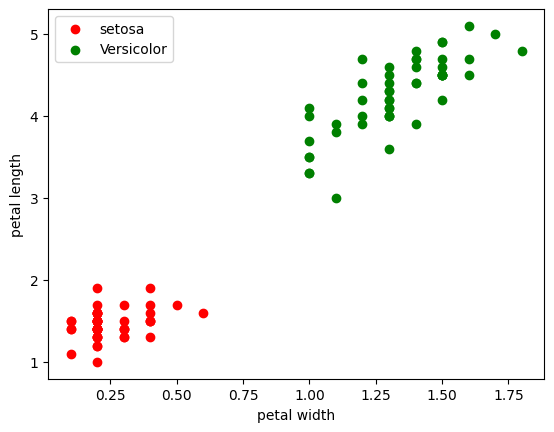

In [76]:
fig=plt.figure()
X_class1=X[y==-1]
X_class2=X[y==1]
plt.scatter(X_class1[:,1],X_class1[:,0],c='r',marker='o')
plt.scatter(X_class2[:,1],X_class2[:,0],c='g',marker='o')
plt.xlabel('petal width')
plt.ylabel('petal length')
plt.legend(['setosa','Versicolor'])
plt.show()

In [81]:
#function adaline
def Adaline (input_N_number,X,y,learning_rate,n_epoch):
    ##fitting
    ##weights and bias, w[0]=b
    weight = np.random.rand(1 +input_N_number)/100
    errFunction_Val = []
    accuracy_Val=[]
    ##activationFunction=Slope*X+ZeroY
    Slope=1
    ZeroY=0
    for i in range(n_epoch):
            ##activation function output
            output = (np.dot(X, weight[1:])+weight[0])*Slope+ZeroY
            errors = (y - output)
            ##updating weights
            weight[1:] += learning_rate * X.T.dot(errors)
            weight[0] += learning_rate * errors.sum()
            ##calculating square error and accuracy
            errorValue = (errors ** 2).sum() / 2.0
            errFunction_Val.append(errorValue)
            y_pred = np.where((np.dot(X, weight[1:]) + weight[0]) * Slope + ZeroY >=  0, 1, -1)
            accuracy_Val.append(accuracy_score(y, y_pred))

    return weight, accuracy_Val, errFunction_Val

In [82]:

def plot_accuracy_error(n_epoch,accuracy_test,error_test,accuracy_train,error_train):
  x = range(1, n_epoch+1)
  fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10, 12))
  #error plot
  ax1.plot(x,error_train, label="Train Error", marker='o')
  ax1.plot(x,error_test , label="Test Error", marker='o')
  ax1.set(xlabel='Epoch', ylabel='Error')
  ax1.set_title('Error per Epoch (Train and Test data)')
  ax1.legend()
  ax1.grid(True)
  #accuracy plot
  ax2.plot(x,accuracy_train , label="Train Accuracy", marker='o')
  ax2.plot(x,accuracy_test , label="Test Accuracy", marker='o')
  ax2.set(xlabel='Epoch', ylabel='Accuracy')
  ax2.set_title('Accuracy per Epoch (Train and Test data)')
  ax2.legend()
  ax2.grid(True)
  plt.show()

def plot_SepLine(X, y, weight, title):

    # Scatter plot of data points
    fig=plt.figure()
    X_class1=X[y==-1]
    X_class2=X[y==1]
    plt.scatter(X_class1[:,1],X_class1[:,0],c='r',marker='o')
    plt.scatter(X_class2[:,1],X_class2[:,0],c='g',marker='o')
    plt.xlabel('petal width')
    plt.ylabel('petal length')
    plt.legend(['setosa','Versicolor'])
   #Seperation line equation:
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x_vals = np.linspace(x_min, x_max, 100)

    y_vals = -(weight[2] * x_vals + weight[0]) / weight[1]
    plt.plot(x_vals, y_vals, "k--")
    plt.title(title)
    plt.grid(True)
    plt.show()


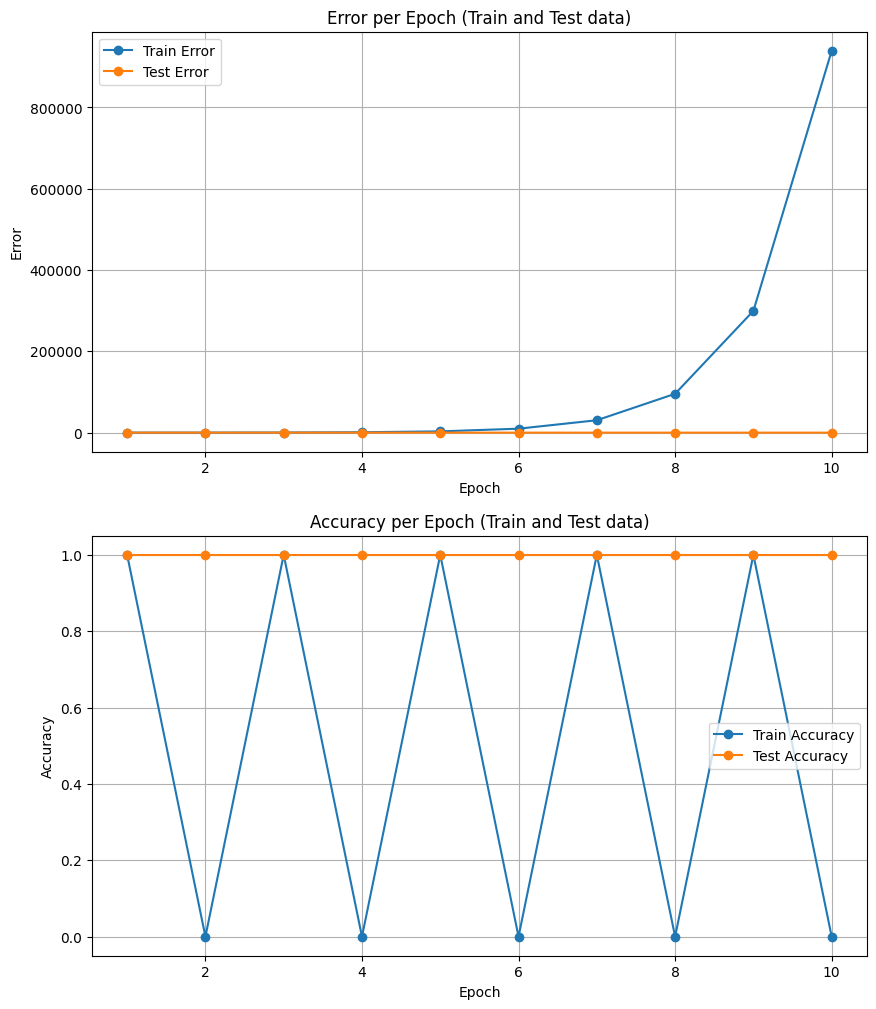

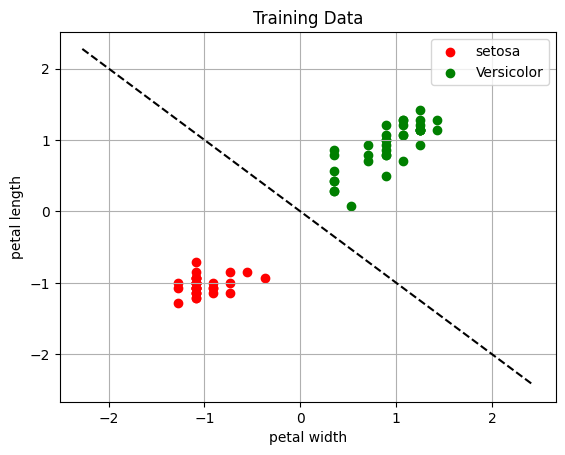

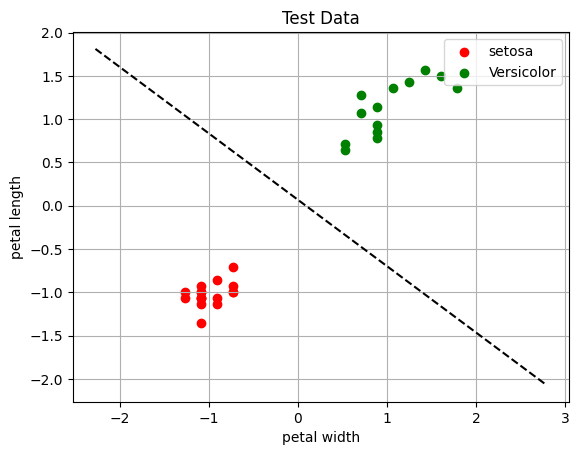

In [83]:
learning_rate = 0.02
n_epoch=10
#adaline inputs=input_N_number,X,y,learning_rate,n_epoch
input_N_number=X_train.shape[1]
weights_train, accuracy_Val_train ,errFunction_Val_train = Adaline(input_N_number, X_train, y_train, learning_rate, n_epoch)
input_N_number=X_test.shape[1]
weights_test, accuracy_Val_test ,errFunction_Val_test = Adaline(input_N_number, X_test, y_test, learning_rate, n_epoch)

plot_accuracy_error(n_epoch, accuracy_Val_test, errFunction_Val_test, accuracy_Val_train, errFunction_Val_train)
plot_SepLine(X_train, y_train, weights_train, "Training Data")
plot_SepLine(X_test, y_test, weights_test, "Test Data")

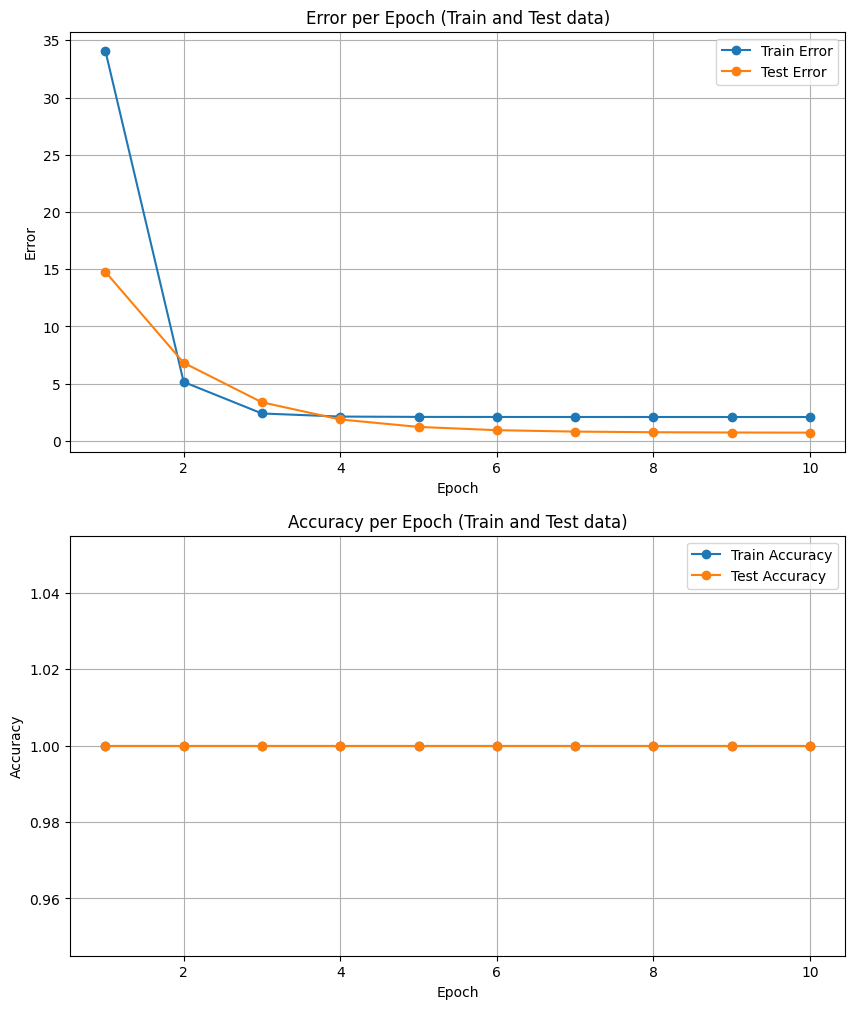

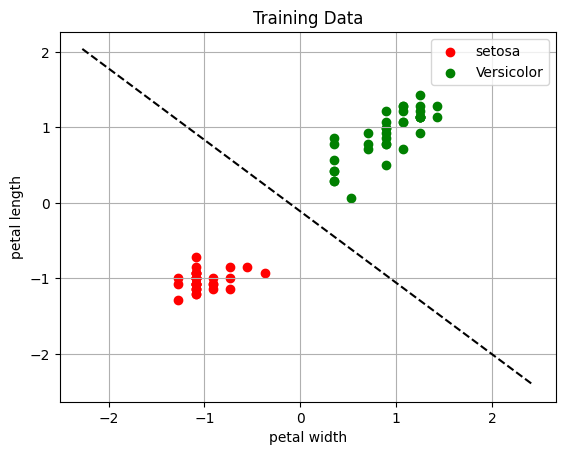

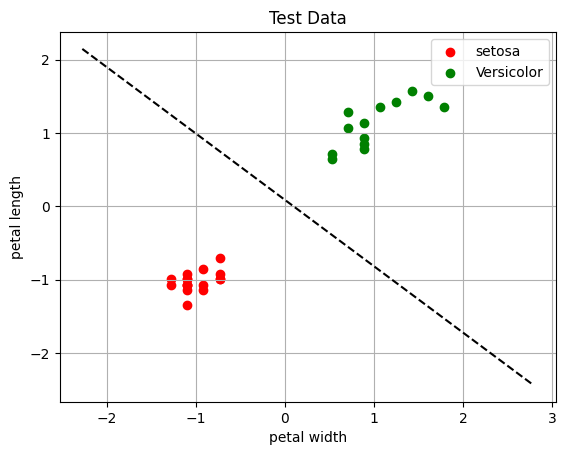

In [84]:
learning_rate = 0.005
n_epoch=10
# adaline inputs=input_N_number,X,y,learning_rate,n_epoch
input_N_number=X_train.shape[1]
weights_train, accuracy_Val_train ,errFunction_Val_train = Adaline(input_N_number, X_train, y_train, learning_rate, n_epoch)
input_N_number=X_test.shape[1]
weights_test, accuracy_Val_test ,errFunction_Val_test = Adaline(input_N_number, X_test, y_test, learning_rate, n_epoch)

plot_accuracy_error(n_epoch, accuracy_Val_test, errFunction_Val_test, accuracy_Val_train, errFunction_Val_train)
plot_SepLine(X_train, y_train, weights_train, "Training Data")
plot_SepLine(X_test, y_test, weights_test, "Test Data")

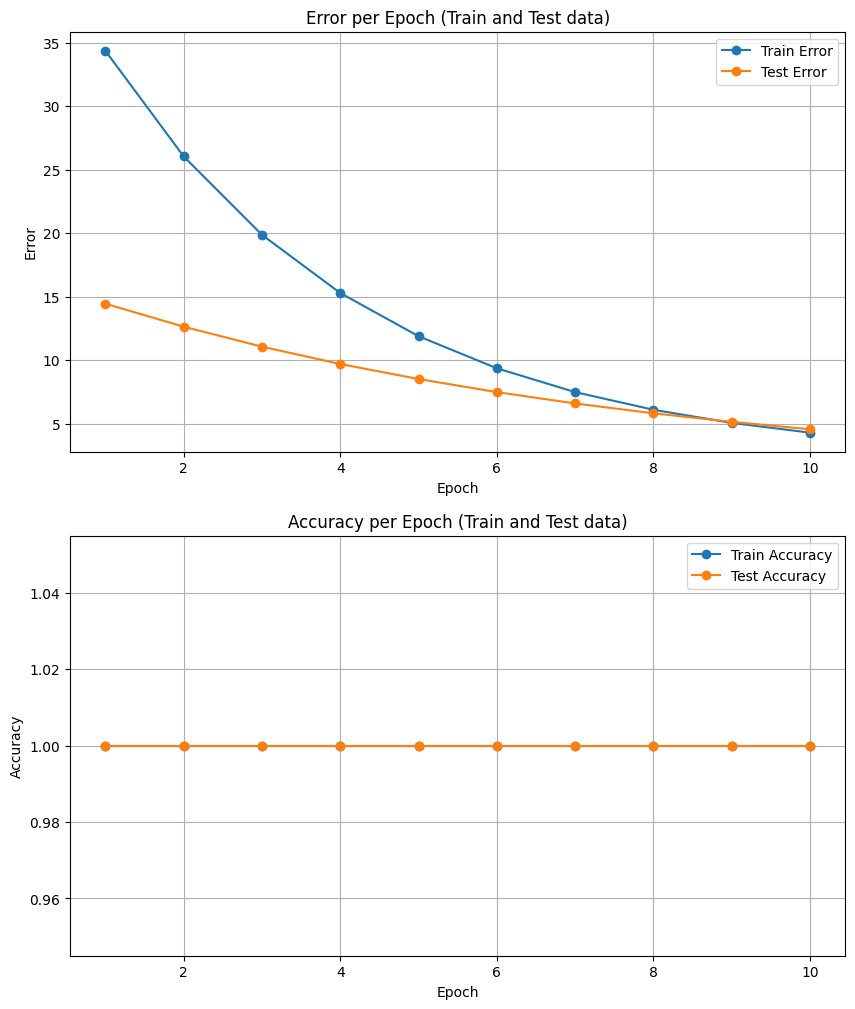

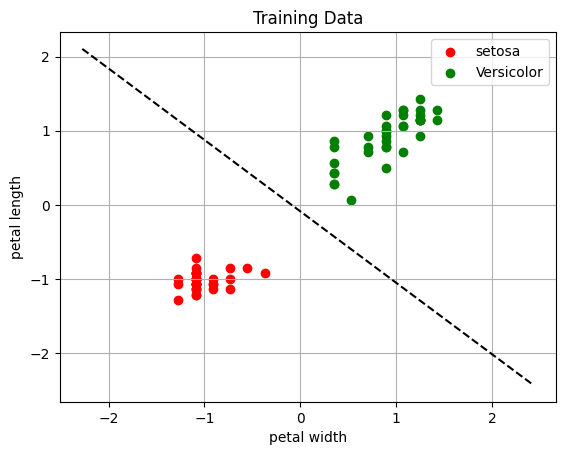

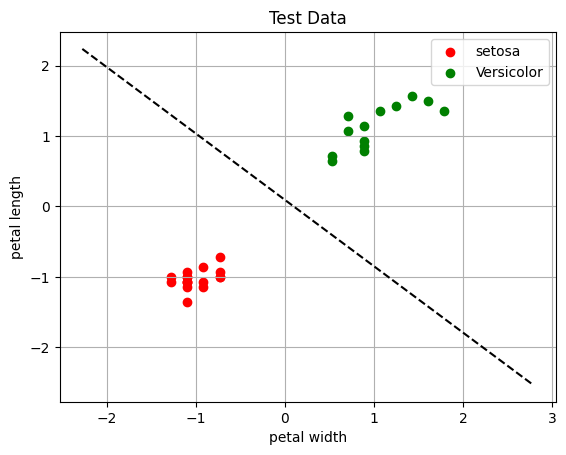

In [85]:
learning_rate = 0.001
n_epoch=10
#define adaline inputs=input_N_number,X,y,learning_rate,n_epoch
input_N_number=X_train.shape[1]
weights_train, accuracy_Val_train ,errFunction_Val_train = Adaline(input_N_number, X_train, y_train, learning_rate, n_epoch)
input_N_number=X_test.shape[1]
weights_test, accuracy_Val_test ,errFunction_Val_test = Adaline(input_N_number, X_test, y_test, learning_rate, n_epoch)

plot_accuracy_error(n_epoch, accuracy_Val_test, errFunction_Val_test, accuracy_Val_train, errFunction_Val_train)
plot_SepLine(X_train, y_train, weights_train, "Training Data")
plot_SepLine(X_test, y_test, weights_test, "Test Data")